In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("C:\\Users\\vvhem\\Downloads\\HR_comma_sep.txt")

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
pd.unique(df.left)

array([1, 0], dtype=int64)

In [8]:
left=df[df.left==1]

In [11]:
left.shape

(3571, 10)

In [12]:
not_left=df[df.left==0]

In [13]:
not_left.shape

(11428, 10)

In [17]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:ylabel='salary'>

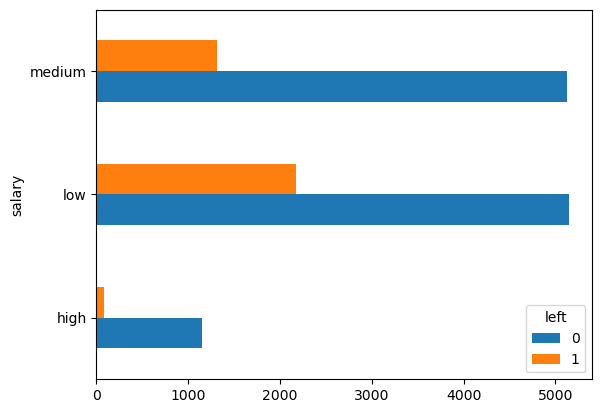

In [34]:
pd.crosstab(df.salary,df.left).plot(kind='barh')

<AxesSubplot:xlabel='Department'>

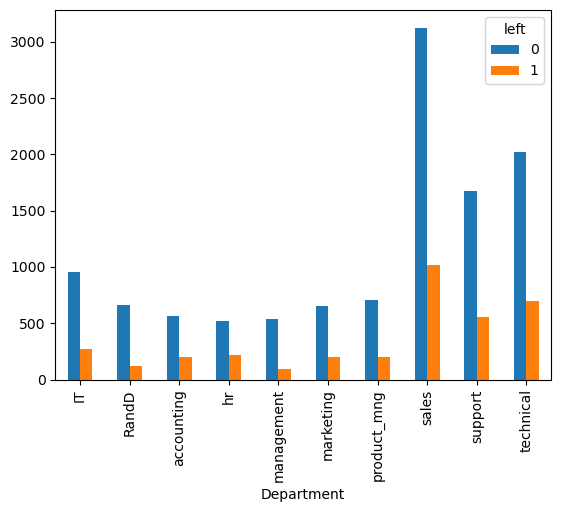

In [36]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [40]:
x=df[['satisfaction_level','average_montly_hours','salary','promotion_last_5years']]
y=df['left']

In [42]:
x['salary']=x['salary'].replace(['low','medium','high'],[0,1,2])

C:\Users\vvhem\AppData\Local\Temp\ipykernel_15820\3907582194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['salary']=x['salary'].replace(['low','medium','high'],[0,1,2])


In [43]:
x

,satisfaction_level,average_montly_hours,salary,promotion_last_5years
0,0.38,157,0,0
1,0.80,262,1,0
2,0.11,272,1,0
3,0.72,223,0,0
4,0.37,159,0,0
...,...,...,...,...
14994,0.40,151,0,0
14995,0.37,160,0,0
14996,0.37,143,0,0
14997,0.11,280,0,0


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [45]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [46]:
reg.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
reg.score(x_test,y_test)

0.7753333333333333